# Project Milestone Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

<font color="blue">
    
* Player - The first and last name of the player
* Team - The abbreviation of the team the player plays for
* G - The number of games the player played in
* GS - The number of games the player started
* CG - The number of complete games pitched by the player
* SHO - The number of shutouts pitched by the player
* IP - The number of innings pitched by the player
* H - The number of hits given up by the pitcher
* ER - The number of earned runs given up by the pitcher
* K - The number of batters struckout by the pitcher
* BB - The number of batters walked by the pitcher
* HR - The number of homeruns given up by the pitcher
* W - The number of wins recorded by the pitcher
* L - The number of losses recorded by the pitcher
* SV - The numeber of saves recorded by the pitcher
* BS - The number of saves blown by the pitcher
* HLD - The number of holds recorded by the pitcher
* ERA - Average earned runs given up over a 9 inning period
* WHIP - The number of walks and hits given up by the pitcher per inning pitched

</font>

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

If you would like to change your project idea from what was described in the proposal, you will need to get permission from your project TA. This is intended to help ensure that your new project idea will meet the requirements of the project. Please see the project proposal for things to be aware of when communicating with your project TA.

<font color="blue">
    
* A scatterplot of the relationship between a pitchers strikeouts per inning pitched and his ERA
* A histogram that shows the number of strikeouts per inning pitched based on the pitcher's ERA
* A line chart of the relationship between a pitchers strikeouts per inning pitched and his ERA

</font>

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include a **hand-drawn image** that shows what your chart or plot will look like. You can insert an image using Edit -> Insert Image.

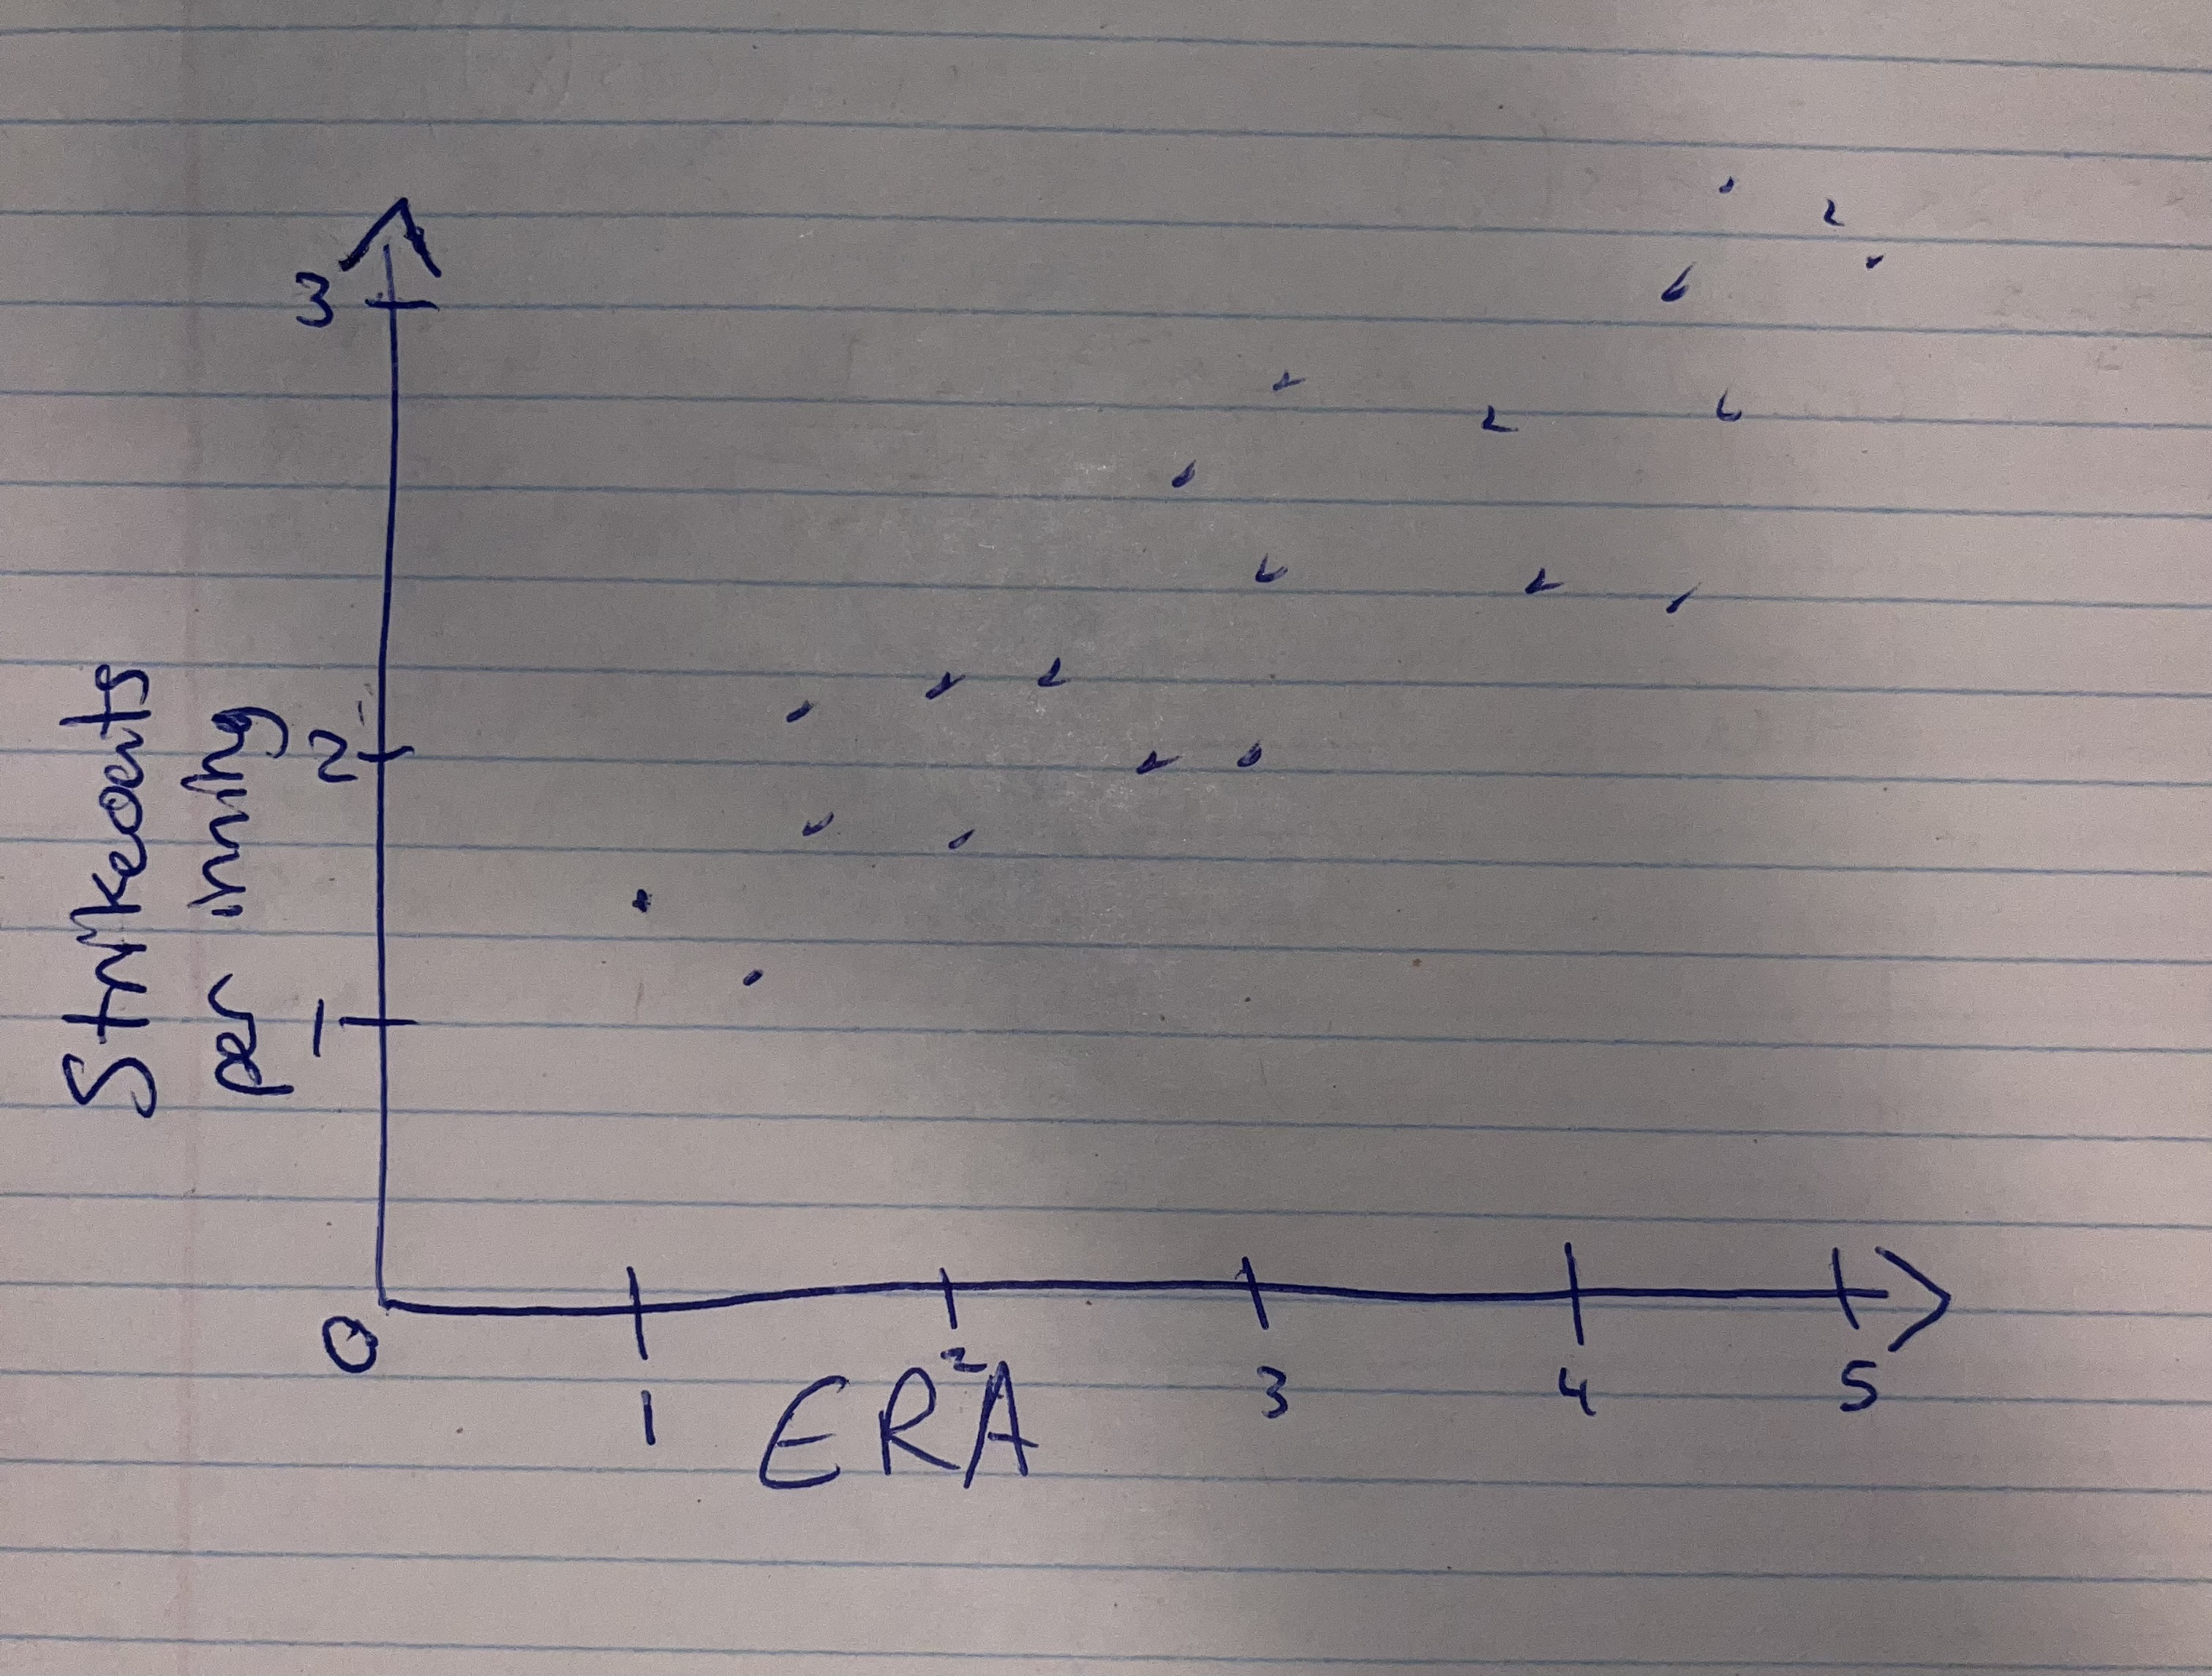

### Step 2a: Building
#### Document which information you will represent in your data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

<font color="blue">
    
From the dataset, I need to use the column of innings pitched (IP) as well as the column of strikeouts recorded (K) in order to calculate the strikeouts per innings pitched (K/IP). I also need to use the column of ERA in order to see if there is a relationship between ERA and K/IP via a scatterplot. In baseball, ERA is one of the most important stats when determining how good a pitcher is. Therefore, it is important to see if there is any relationship between strikeouts per inning and ERA in order to determine if striking out more players relates to giving up less runs.

</font>

#### Design the data definitions

In [1]:
from cs103 import *
import csv
from typing import NamedTuple, List, Optional
import matplotlib.pyplot as pyplot

In [2]:
EarnedRunAverage = float #in range [0.00, ...)
#interp. the earned run average of a player to 2 decimals

ERA0 = 0.00
ERA1 = 1.75
ERA2 = 2.81
ERA3 = 12.72

@typecheck
def fn_for_earned_run_average(era: EarnedRunAverage) -> ...:
    return ...(era) #template based on Atomic non-Distinct

StrikeoutsAndInning = NamedTuple("StrikeoutsAndInning", [("strikeouts", int), #in range [0, ...)
                                                         ("innings", float)]) #in range [0, ...)
#interp. the number of strikeouts and number of innings pitched by a pitcher

KIP0 = StrikeoutsAndInning(0, 0)
KIP1 = StrikeoutsAndInning(57, 102.2)
KIP2 = StrikeoutsAndInning(201, 187.1)

@typecheck
def fn_for_strikeouts_And_inning(spi: StrikeoutsAndInning) -> ...: #template based on compound (2 variables)
    return ...(spi.strikouts,
               spi.innings)

KPerInningVsEarnedRunAverage = NamedTuple("KPerInningVsEarnedRunAverage", [("ksperinning", StrikeoutsAndInning),
                                                                           ("era", EarnedRunAverage)])
#interp. the strikeouts per inning and era of a given pitcher

KIERA0 = KPerInningVsEarnedRunAverage(KIP0, ERA0)
KIERA1 = KPerInningVsEarnedRunAverage(KIP1, ERA1)
KIERA2 = KPerInningVsEarnedRunAverage(KIP2, ERA2)

@typecheck
def fn_for_k_per_inning_vs_earned_run_average(kve: KPerInningVsEarnedRunAverage) -> ...: #template based on compound (2 variables)
    return ...(fn_for_strikeouts_and_inning(kve), fn_for_earned_run_average(kve))

#List[KPerInningVsEarnedRunAverage]
#interp. list of KPerInningVsEarnedRunAverage

LOKIE0 = []
LOKIE1 = [KIERA0]
LOKIE2 = [KIERA0, KIERA1]
LOKIE3 = [KIERA0, KIERA1, KIERA2]

kperinningandera = NamedTuple("kperinningandera", [("kperip", float), #in range [0, 3]
                                                   ("era", float)])   #in range [0, ...)
#interp. the rate of strikeouts per inning ("kperip") with max of 3, and the era of a pitcher ("era")

KIE0 = []
KIE1 = [(1.29, 3.21)]
KIE2 = [(1.29, 3.21), (0.85, 4.96)]

@typecheck
def fn_for_k_per_inning_and_era(kiera: kperinningandera) -> ...:  #template based on compound (2 variables)
    return ...(kiera.kperip,
               kiera.era)

# template based on Arbitrary-sized and reference rule
@typecheck
def fn_for_lokie(lokie: List[KPerInningVsEarnedRunAverage]) -> ...:
    # description of the accumulator
    acc = ...      # type: ...
    for kie in lokie:
        acc = ...(fn_for_k_per_inning_vs_earned_run_average(kie), acc)

    return ...(acc)

### Step 2b: Building
#### Design a function to read the information and store it as data in your program

Complete this step in the code cell below. Your `read` function should remove any row with invalid or missing data but otherwise keep all the rows. I.e., you should **not** design the `read` function such that it only returns the rows you need for step 2c.

You can choose to continue to build on this file when completing the final submission for the project (as opposed to copying your code over to the `project_final_submission_template.ipynb` file). However, if this is the approach you are taking, please go to the `project_final_submission_template.ipynb` file and read through the "Step 2b and 2c: Building" section. This section contains crucial information about common issues students encounter. We expect that you will be familiar with this information.

In [3]:
def parse_float(value: str) -> float:
    """
    Converts a string to a float, returning 0.0 on error
    """
    try:
        return float(value)
    except ValueError:
        return 0.0  # Default value in case of invalid data

def parse_int(value: str) -> int:
    """
    Converts a string to an integer, returning 0 on error
    """
    try:
        return int(value)
    except ValueError:
        return 0 


@typecheck
def read(filename: str) -> List[KPerInningVsEarnedRunAverage]:
    """    
    reads information from the specified file and returns a list of KPerInningVsEarnedRunAverage
    """
    #return []  #stub
    # Template from HtDAP
    
    # lokie contains the result so far
    lokie = [] # type: List[KPerInningVsEarnedRunAverage]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            
            KandInnings = (parse_int(row[10]), parse_float(row[7]))
            
            kie = KPerInningVsEarnedRunAverage(KandInnings, parse_float(row[18]))
            
            lokie.append(kie)
    
    return lokie


start_testing()

expect(read('testfile_empty-Copy1.csv'), [])
expect(read('cpsci103 test 3 rows - Sheet1-Copy1.csv'), [KPerInningVsEarnedRunAverage((114, 138.0), 3.72),
                                                         KPerInningVsEarnedRunAverage((103, 78.1), 3.1),
                                                         KPerInningVsEarnedRunAverage((50, 47.0), 2.49)])
expect(read('1 row test - Sheet1-Copy1.csv'), [KPerInningVsEarnedRunAverage((57, 102.2), 1.75)])


summary()

3 of 3 tests passed


In [4]:
@typecheck
def ks_divided_by_innings(kdi: StrikeoutsAndInning) -> float:
    """
    takes the strikeouts value of a pitcher and divides it by the innings pitched value
    """
    #return 0 #stub
    #return ...(k, i) #template
    if kdi.innings == 0:
        return 0
        
    else:
        return kdi.strikeouts/kdi.innings

start_testing()

expect(ks_divided_by_innings(StrikeoutsAndInning(10, 2)), 5)
expect(ks_divided_by_innings(StrikeoutsAndInning(6, 2)), 3)
expect(ks_divided_by_innings(StrikeoutsAndInning(1, 2)), 0.5)
expect(ks_divided_by_innings(StrikeoutsAndInning(75, 0)), 0)

summary()

4 of 4 tests passed


In [5]:
@typecheck
def k_per_inning_and_era(lokpie: List[KPerInningVsEarnedRunAverage]) -> List[kperinningandera]:
    """
    takes a list of KPerInningVsEarnedRunAverage and returns a list of kperinningandera
    """
    #return [] #stub
    #template from arbitrary-sized

    #accumulator hold all kperip and era seen so far
    lokiera = []    #type: List[kperinningandera]

    for kpie in lokpie:

        strikeouts_and_innings = StrikeoutsAndInning(kpie.ksperinning[0], kpie.ksperinning[1])

        kperip = ks_divided_by_innings(strikeouts_and_innings)

        kpie = kperinningandera(kperip, kpie.era)

        lokiera.append(kpie)

    return lokiera

start_testing()

expect(k_per_inning_and_era([KPerInningVsEarnedRunAverage((57, 102.2), 1.75)]), [((57 / 102.2), 1.75)])
expect(k_per_inning_and_era([KPerInningVsEarnedRunAverage(ksperinning=(114, 138.0), era=3.72), 
                   KPerInningVsEarnedRunAverage(ksperinning=(103, 78.1), era=3.1),
                   KPerInningVsEarnedRunAverage(ksperinning=(50, 47.0), era=2.49)]), [((114/138.0), 3.72), ((103/78.1), 3.1), ((50/47.0), 2.49)])
expect(k_per_inning_and_era(read('cpsci103 test 3 rows - Sheet1-Copy1.csv')), [((114/138.0), 3.72), ((103/78.1), 3.1), ((50/47.0), 2.49)])

summary()

3 of 3 tests passed


In [6]:
@typecheck
def make_list_k_per_inning(loke: List[kperinningandera]) -> List[float]:
    """
    takes a list of kperinningandera and returns a list of floats of the values of strikeouts per inning
    """
    #return []
    #template based on arbitrary-sized

    #accumulator holds all values of kperip seen so far
    lokpi = []   #type: List[float]

    for ke in loke:

        ke = ke.kperip

        lokpi.append(ke)

    return lokpi

start_testing()

expect(make_list_k_per_inning([kperinningandera(kperip=0.5577299412915852, era=1.75)]), [0.5577299412915852])
expect(make_list_k_per_inning([kperinningandera(kperip=0.8260869565217391, era=3.72), 
                               kperinningandera(kperip=1.3188220230473753, era=3.1), 
                               kperinningandera(kperip=1.0638297872340425, era=2.49)]), [0.8260869565217391, 1.3188220230473753, 1.0638297872340425])
expect(make_list_k_per_inning(k_per_inning_and_era(read('cpsci103 test 3 rows - Sheet1-Copy1.csv'))), [0.8260869565217391, 1.3188220230473753, 1.0638297872340425])

summary()

3 of 3 tests passed


In [7]:
@typecheck
def make_list_era(lokera: List[kperinningandera]) -> List[float]:
    """
    takes a list of kperinningandera and returns a list of floats of the values of ERA
    """
    #return []
    #template based on arbitrary-sized

    #accumulator holds all values of era seen so far
    loera = []   #type: List[float]

    for kera in lokera:

        kera = kera.era

        loera.append(kera)

    return loera

start_testing()

expect(make_list_era([kperinningandera(kperip=0.5577299412915852, era=1.75)]), [1.75])
expect(make_list_era([kperinningandera(kperip=0.8260869565217391, era=3.72), 
                      kperinningandera(kperip=1.3188220230473753, era=3.1), 
                      kperinningandera(kperip=1.0638297872340425, era=2.49)]), [3.72, 3.1, 2.49])
expect(make_list_era(k_per_inning_and_era(read('cpsci103 test 3 rows - Sheet1-Copy1.csv'))), [3.72, 3.1, 2.49])

summary()

3 of 3 tests passed


In [8]:
@typecheck
def analyze(lokpipe: List[KPerInningVsEarnedRunAverage]) -> None: 
    """ 
    creates a scatterplot of the heights and weights, returns None
    """ 
    #return None  #stub
    #template from scatterplot
    
    pyplot.xlabel('ERA')
    pyplot.ylabel('Strikeouts per Inning')
    pyplot.title('A pitchers rate of strikeouts per inning vs his earned run average')
    pyplot.axis([0.2, 10, 0, 3])#any ERA values above 40 are extreme outliers due to very minimal innings pitched
#maximim of 3 outs per inning meaning no more than 3 strikeouts per inning except in very rare cases which would be considered outliers


    pyplot.scatter(make_list_era(k_per_inning_and_era(lokpipe)), make_list_k_per_inning(k_per_inning_and_era(lokpipe)))

    pyplot.show()

    return None 

#expect scatterplot with ERA on x-axis and Strikeouts per Inning on y-axis

In [9]:
@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, returns a scatterplot of data 
    """
    #return None # stub
    # Template from HtDAP, based on function composition 
    
    return analyze(read(filename)) 

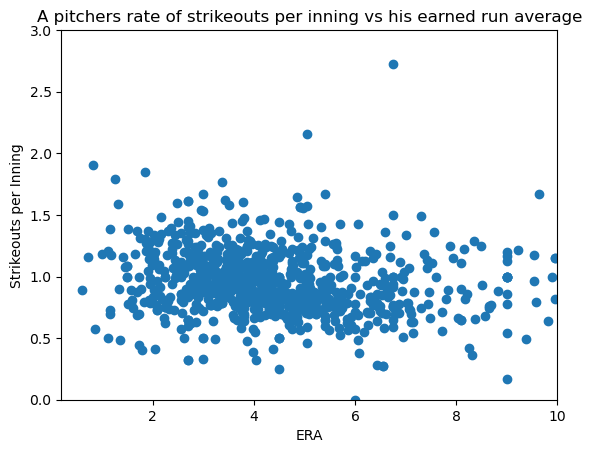

In [10]:
main('mlb-player-stats-P (1)-Copy1.csv')

In [12]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 147818
ASSIGNMENT = 1966017 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('final_pro…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

# Please double check your submission on Canvas to ensure that the right files (Jupyter file + CSVs) have been submitted and that the files do not contain unexpected errors.

<font color="red">**You should always check your submission on Canvas. It is your responsibility to ensure that the correct file has been submitted for grading.**</font> Regrade or accomodation requests using reasoning such as "I didn't realize I submitted the wrong file"/"I didn't realize the submission didn't work"/"I didn't realize I didn't save before submitting so some of my work is missing" will not be considered.